<a href="https://colab.research.google.com/github/juanFFlorezM/Extraccion_de_datos/blob/main/Nulos_Atipicos_Munich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Procesamiento de nulos y Atipicos de la BD Listing de Airbnb Munich

In [2]:
#Este código permite cargar las librerias pandas, numpy y pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Cargamos en el dataframe data la información del archivo listing.csv y desplegamos los cinco primeros registros del dataframe
data = pd.read_csv('listings.csv')
data.head(6)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/rooms/97945,20241227033114,2024-12-27,city scrape,Deluxw-Apartm. with roof terrace,NaN,We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,...,4.93,4.78,4.73,NaN,f,2,2,0,0,0.78
1,114695,https://www.airbnb.com/rooms/114695,20241227033114,2024-12-27,city scrape,Apartment Munich/East with sundeck,NaN,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737,...,5.00,4.67,4.62,NaN,f,3,3,0,0,0.48
2,127383,https://www.airbnb.com/rooms/127383,20241227033114,2024-12-27,city scrape,City apartment next to Pinakothek,NaN,NaN,https://a0.muscache.com/pictures/79238c11-bc61...,630556,...,4.96,4.91,4.81,NaN,f,1,1,0,0,0.70
3,159634,https://www.airbnb.com/rooms/159634,20241227033114,2024-12-27,previous scrape,"Fancy, bright central roof top flat and homeof...",In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/336144dc-b06d...,765694,...,4.80,4.59,4.45,NaN,t,1,1,0,0,0.27
4,170154,https://www.airbnb.com/rooms/170154,20241227033114,2024-12-27,city scrape,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,108297,...,4.98,4.77,4.91,NaN,f,1,0,1,0,3.55
5,172672,https://www.airbnb.com/rooms/172672,20241227033114,2024-12-27,previous scrape,Cozy guest room in high-end flat.,Comfortable guest room in central area of Muni...,Residential area in Schwabing-West. There are ...,https://a0.muscache.com/pictures/528025e8-2c8e...,823913,...,4.92,4.86,4.77,NaN,f,1,0,1,0,1.81


In [4]:
#verificamos la informacion del dataframe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7281 entries, 0 to 7280
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7281 non-null   int64  
 1   listing_url                                   7281 non-null   object 
 2   scrape_id                                     7281 non-null   int64  
 3   last_scraped                                  7281 non-null   object 
 4   source                                        7281 non-null   object 
 5   name                                          7281 non-null   object 
 6   description                                   7010 non-null   object 
 7   neighborhood_overview                         2564 non-null   object 
 8   picture_url                                   7281 non-null   object 
 9   host_id                                       7281 non-null   i

In [5]:
# El siguiente código permite listar la cantidad de valores nulos presente en data
valores_nulos = data.isnull().sum()
valores_nulos

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
...,...
calculated_host_listings_count,0
calculated_host_listings_count_entire_homes,0
calculated_host_listings_count_private_rooms,0
calculated_host_listings_count_shared_rooms,0


In [7]:
#Este codigo despliega solamente las variables de data que contienen valores nulos y su cantidad
valores_nulos[valores_nulos > 0]

,0
description,271
neighborhood_overview,4717
host_name,2
host_since,2
host_location,1558
host_about,4470
host_response_time,2615
host_response_rate,2615
host_acceptance_rate,1427
host_is_superhost,58


In [8]:
#El siguiente codigo reemplaza los valores nulos presentes en data con el metodo bfill y el resultado lo guarda en un dataframe data1
data1 = data.fillna(method='bfill')
data1

<ipython-input-8-631c28a7ac97>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1 = data.fillna(method='bfill')


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/rooms/97945,20241227033114,2024-12-27,city scrape,Deluxw-Apartm. with roof terrace,In this idyllic stylish flat you live very qui...,We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,...,4.93,4.78,4.73,IDD L2N4J945J,f,2,2,0,0,0.78
1,114695,https://www.airbnb.com/rooms/114695,20241227033114,2024-12-27,city scrape,Apartment Munich/East with sundeck,In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/21571874/960e...,581737,...,5.00,4.67,4.62,IDD L2N4J945J,f,3,3,0,0,0.48
2,127383,https://www.airbnb.com/rooms/127383,20241227033114,2024-12-27,city scrape,City apartment next to Pinakothek,In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/79238c11-bc61...,630556,...,4.96,4.91,4.81,IDD L2N4J945J,f,1,1,0,0,0.70
3,159634,https://www.airbnb.com/rooms/159634,20241227033114,2024-12-27,previous scrape,"Fancy, bright central roof top flat and homeof...",In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/336144dc-b06d...,765694,...,4.80,4.59,4.45,IDD L2N4J945J,t,1,1,0,0,0.27
4,170154,https://www.airbnb.com/rooms/170154,20241227033114,2024-12-27,city scrape,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",Residential area in Schwabing-West. There are ...,https://a0.muscache.com/pictures/31636890/593e...,108297,...,4.98,4.77,4.91,IDD L2N4J945J,f,1,0,1,0,3.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7276,1318625666596506954,https://www.airbnb.com/rooms/1318625666596506954,20241227033114,2024-12-27,city scrape,Stylish Home Bogenhausen,Hype two room apartment in Bogenhausen. The br...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,44358496,...,NaN,NaN,NaN,NaN,t,2,1,1,0,NaN
7277,1318641181003988391,https://www.airbnb.com/rooms/1318641181003988391,20241227033114,2024-12-27,city scrape,Boho City Livings Munich,Welcome to your stylish boho home in the middl...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,175660452,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
7278,1319473798937477143,https://www.airbnb.com/rooms/1319473798937477143,20241227033114,2024-12-27,city scrape,Welcome to MyCozyHome,"From this centrally located accommodation, you...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,508416232,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
7279,1319597606422421040,https://www.airbnb.com/rooms/1319597606422421040,20241227033114,2024-12-27,city scrape,3-room apartment in the center of Munich,3-room apartment in the center of Munich with ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,594363723,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN


In [9]:
#ahora se corrobora la cantidad de valores nulos presente en data1
valores_nulos = data1.isnull().sum()
valores_nulos

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
...,...
calculated_host_listings_count,0
calculated_host_listings_count_entire_homes,0
calculated_host_listings_count_private_rooms,0
calculated_host_listings_count_shared_rooms,0


In [10]:
#este codigo despliega solamente las variables de data1 que contiene valores nulos:
valores_nulos[valores_nulos > 0]

,0
neighborhood_overview,23
host_location,1
host_about,3
host_neighbourhood,24
neighbourhood,23
neighbourhood_group_cleansed,7281
calendar_updated,7281
first_review,23
last_review,23
review_scores_rating,23


In [12]:
#El siguiente código me despliega el tipo de las variables en data1 que contienen valores nulos
valores_nulos[valores_nulos > 0].dtype

dtype('int64')

In [13]:
#El siguiente codigo despliega la info de data1
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7281 entries, 0 to 7280
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7281 non-null   int64  
 1   listing_url                                   7281 non-null   object 
 2   scrape_id                                     7281 non-null   int64  
 3   last_scraped                                  7281 non-null   object 
 4   source                                        7281 non-null   object 
 5   name                                          7281 non-null   object 
 6   description                                   7281 non-null   object 
 7   neighborhood_overview                         7258 non-null   object 
 8   picture_url                                   7281 non-null   object 
 9   host_id                                       7281 non-null   i

In [14]:
#El siguiente codigo reemplaza los valores nulos presentes en data1 con el metodo ffill y los guarda en data2
data2 = data1.fillna(method='ffill')
data2



<ipython-input-14-9ec8b7514dbf>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data2 = data1.fillna(method='ffill')


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/rooms/97945,20241227033114,2024-12-27,city scrape,Deluxw-Apartm. with roof terrace,In this idyllic stylish flat you live very qui...,We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,...,4.93,4.78,4.73,IDD L2N4J945J,f,2,2,0,0,0.78
1,114695,https://www.airbnb.com/rooms/114695,20241227033114,2024-12-27,city scrape,Apartment Munich/East with sundeck,In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/21571874/960e...,581737,...,5.00,4.67,4.62,IDD L2N4J945J,f,3,3,0,0,0.48
2,127383,https://www.airbnb.com/rooms/127383,20241227033114,2024-12-27,city scrape,City apartment next to Pinakothek,In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/79238c11-bc61...,630556,...,4.96,4.91,4.81,IDD L2N4J945J,f,1,1,0,0,0.70
3,159634,https://www.airbnb.com/rooms/159634,20241227033114,2024-12-27,previous scrape,"Fancy, bright central roof top flat and homeof...",In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/336144dc-b06d...,765694,...,4.80,4.59,4.45,IDD L2N4J945J,t,1,1,0,0,0.27
4,170154,https://www.airbnb.com/rooms/170154,20241227033114,2024-12-27,city scrape,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",Residential area in Schwabing-West. There are ...,https://a0.muscache.com/pictures/31636890/593e...,108297,...,4.98,4.77,4.91,IDD L2N4J945J,f,1,0,1,0,3.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7276,1318625666596506954,https://www.airbnb.com/rooms/1318625666596506954,20241227033114,2024-12-27,city scrape,Stylish Home Bogenhausen,Hype two room apartment in Bogenhausen. The br...,Groceries Edeka Rossman <br />tram station <br...,https://a0.muscache.com/pictures/hosting/Hosti...,44358496,...,5.00,5.00,5.00,HRB119647,t,2,1,1,0,1.00
7277,1318641181003988391,https://www.airbnb.com/rooms/1318641181003988391,20241227033114,2024-12-27,city scrape,Boho City Livings Munich,Welcome to your stylish boho home in the middl...,Groceries Edeka Rossman <br />tram station <br...,https://a0.muscache.com/pictures/hosting/Hosti...,175660452,...,5.00,5.00,5.00,HRB119647,t,1,1,0,0,1.00
7278,1319473798937477143,https://www.airbnb.com/rooms/1319473798937477143,20241227033114,2024-12-27,city scrape,Welcome to MyCozyHome,"From this centrally located accommodation, you...",Groceries Edeka Rossman <br />tram station <br...,https://a0.muscache.com/pictures/hosting/Hosti...,508416232,...,5.00,5.00,5.00,HRB119647,f,1,1,0,0,1.00
7279,1319597606422421040,https://www.airbnb.com/rooms/1319597606422421040,20241227033114,2024-12-27,city scrape,3-room apartment in the center of Munich,3-room apartment in the center of Munich with ...,Groceries Edeka Rossman <br />tram station <br...,https://a0.muscache.com/pictures/miso/Hosting-...,594363723,...,5.00,5.00,5.00,HRB119647,t,2,2,0,0,1.00


In [15]:
#Ahora se corrobora la cantidad de nulos presentes en data2
valores_nulos = data2.isnull().sum()
valores_nulos

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
...,...
calculated_host_listings_count,0
calculated_host_listings_count_entire_homes,0
calculated_host_listings_count_private_rooms,0
calculated_host_listings_count_shared_rooms,0


In [17]:
#ahora se calcula cantidad de nulos en data2
valores_nulos[valores_nulos > 0]

,0
neighbourhood_group_cleansed,7281
calendar_updated,7281


In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7281 entries, 0 to 7280
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7281 non-null   int64  
 1   listing_url                                   7281 non-null   object 
 2   scrape_id                                     7281 non-null   int64  
 3   last_scraped                                  7281 non-null   object 
 4   source                                        7281 non-null   object 
 5   name                                          7281 non-null   object 
 6   description                                   7281 non-null   object 
 7   neighborhood_overview                         7281 non-null   object 
 8   picture_url                                   7281 non-null   object 
 9   host_id                                       7281 non-null   i

In [19]:
#Este codigo me permite eliminar en la variable price da data2 el signo de coma:
data2['price'] = data2['price'].str.replace(',', '')

In [21]:
#Este codigo me permite eliminar el signo $ de la variable price:
data2['price'] = data2['price'].str.replace('$', '')

In [22]:
#Este codigo me permite convertir la variable price de object a float64
data2['price'] = data2['price'].astype(float)

In [23]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7281 entries, 0 to 7280
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7281 non-null   int64  
 1   listing_url                                   7281 non-null   object 
 2   scrape_id                                     7281 non-null   int64  
 3   last_scraped                                  7281 non-null   object 
 4   source                                        7281 non-null   object 
 5   name                                          7281 non-null   object 
 6   description                                   7281 non-null   object 
 7   neighborhood_overview                         7281 non-null   object 
 8   picture_url                                   7281 non-null   object 
 9   host_id                                       7281 non-null   i

In [28]:
#El siguiente codigo me permite saber y contar cuantas variables en data2 son tipo float64
data2.select_dtypes(include=['int64']).count()

,0
id,7281
scrape_id,7281
host_id,7281
accommodates,7281
minimum_nights,7281
maximum_nights,7281
minimum_minimum_nights,7281
maximum_minimum_nights,7281
minimum_maximum_nights,7281
maximum_maximum_nights,7281


In [29]:
#El siguiente codigo me permite identificar las columnas int64 de data2 y convertir esas columnas a float en el mismo data2
data2[data2.select_dtypes(include=['int64']).columns] = data2.select_dtypes(include=['int64']).astype(float)

In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7281 entries, 0 to 7280
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7281 non-null   float64
 1   listing_url                                   7281 non-null   object 
 2   scrape_id                                     7281 non-null   float64
 3   last_scraped                                  7281 non-null   object 
 4   source                                        7281 non-null   object 
 5   name                                          7281 non-null   object 
 6   description                                   7281 non-null   object 
 7   neighborhood_overview                         7281 non-null   object 
 8   picture_url                                   7281 non-null   object 
 9   host_id                                       7281 non-null   f

In [33]:
# El siguiente codigo elimina las dos columnas de data2 que presentan: 0 non-null float64
del data2['calendar_updated']
del data2['neighbourhood_group_cleansed']

In [34]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7281 entries, 0 to 7280
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7281 non-null   float64
 1   listing_url                                   7281 non-null   object 
 2   scrape_id                                     7281 non-null   float64
 3   last_scraped                                  7281 non-null   object 
 4   source                                        7281 non-null   object 
 5   name                                          7281 non-null   object 
 6   description                                   7281 non-null   object 
 7   neighborhood_overview                         7281 non-null   object 
 8   picture_url                                   7281 non-null   object 
 9   host_id                                       7281 non-null   f

Las siguientes instrucciones estan asociadas a Valores Atipicos

In [47]:
#Se crea un dataframe cuantitativos para procesar los outliers
#Se divide el dataframe data2 en dos dataframe: cuantitativos y cualitativos
#Los cuantitativos contienen todas las columnas tipo float64
#Los cualitativos contienen todas las columnas tipo object
cuantitativos = data2.select_dtypes(include=['float64'])
cualitativos = data2.select_dtypes(include=['object'])

In [48]:
#Se verifica la informacion de cada nuevo dataframe
cuantitativos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7281 entries, 0 to 7280
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7281 non-null   float64
 1   scrape_id                                     7281 non-null   float64
 2   host_id                                       7281 non-null   float64
 3   host_listings_count                           7281 non-null   float64
 4   host_total_listings_count                     7281 non-null   float64
 5   latitude                                      7281 non-null   float64
 6   longitude                                     7281 non-null   float64
 7   accommodates                                  7281 non-null   float64
 8   bathrooms                                     7281 non-null   float64
 9   bedrooms                                      7281 non-null   f

<Figure size 1500x800 with 0 Axes>

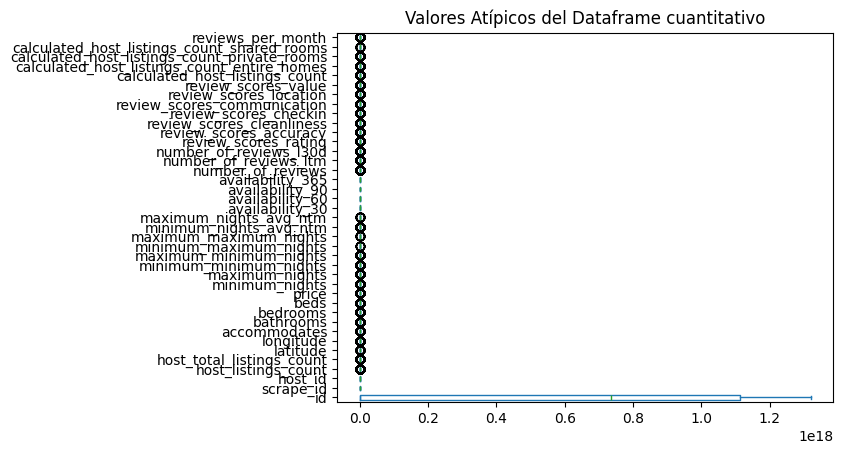

In [51]:
#Se genera el diagrama de cajas y bigotes del dataframe cuantitativas
fig = plt.figure(figsize =(15, 8))
cuantitativos.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe cuantitativo")
plt.show() #dibujamos el diagrama

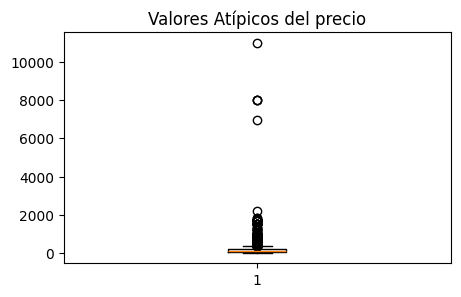

In [53]:
#Se genera el codigo para dibujar un grafico de cajas y bigotes de precio
fig = plt.figure(figsize =(5, 3))
plt.boxplot(cuantitativos["price"])
plt.title("Valores Atípicos del precio")
plt.show()

Procedimiento de eliminacion de atipicos con la desviacion estandar

In [54]:
#El siguiente codigo me permite calcular con el metodo de la desviacion estandar el limite superior y el limite inferior de cuantitativas e imprimir esos valores limite
y = cuantitativos
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido id                                              2.166532e+18
scrape_id                                       2.024123e+13
host_id                                         7.941139e+08
host_listings_count                             1.329104e+02
host_total_listings_count                       1.566496e+02
latitude                                        4.821639e+01
longitude                                       1.171355e+01
accommodates                                    7.714295e+00
bathrooms                                       2.548405e+00
bedrooms                                        4.351677e+00
beds                                            5.651357e+00
price                                           1.032939e+03
minimum_nights                                  1.004403e+02
maximum_nights                                  1.493790e+03
minimum_minimum_nights                          9.732033e+01
maximum_minimum_nights                          1.038998e+0

In [55]:
#El siguiente codigo aplica el metodo de desviación estandar en cuantitativas y el resultado lo guarda en data3
data3 = cuantitativos[(y <= Limite_Superior) & (y >= Limite_Inferior)]
data3

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9.794500e+04,2.024123e+13,517685.0,2.0,3.0,48.114920,11.489540,2.0,1.0,1.0,...,4.81,4.90,4.93,4.78,4.73,2.0,2.0,0.0,0.0,0.78
1,1.146950e+05,2.024123e+13,581737.0,3.0,3.0,48.120710,11.637580,5.0,1.0,1.0,...,4.95,4.97,5.00,4.67,4.62,3.0,3.0,0.0,0.0,0.48
2,1.273830e+05,2.024123e+13,630556.0,2.0,2.0,48.151990,11.564820,4.0,1.0,1.0,...,4.81,4.98,4.96,4.91,4.81,1.0,1.0,0.0,0.0,0.70
3,1.596340e+05,2.024123e+13,765694.0,1.0,1.0,48.138550,11.465860,3.0,1.0,1.0,...,4.25,4.75,4.80,4.59,4.45,1.0,1.0,0.0,0.0,0.27
4,1.701540e+05,2.024123e+13,108297.0,1.0,1.0,48.108140,11.527330,4.0,1.0,1.0,...,4.99,4.99,4.98,4.77,4.91,1.0,0.0,1.0,0.0,3.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7276,1.318626e+18,2.024123e+13,44358496.0,2.0,2.0,48.148018,11.630054,2.0,1.0,1.0,...,5.00,5.00,5.00,5.00,5.00,2.0,1.0,1.0,0.0,1.00
7277,1.318641e+18,2.024123e+13,175660452.0,1.0,1.0,48.142272,11.560069,3.0,1.0,1.0,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
7278,1.319474e+18,2.024123e+13,508416232.0,1.0,1.0,48.168330,11.563850,4.0,1.0,2.0,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
7279,1.319598e+18,2.024123e+13,594363723.0,2.0,2.0,48.126390,11.591206,6.0,1.5,2.0,...,5.00,5.00,5.00,5.00,5.00,2.0,2.0,0.0,0.0,1.00


In [56]:
#El siguiente codigo imprime el listado de los nulos presentes en dataframe data3
valores_nulos = data3.isnull().sum()
valores_nulos

,0
id,0
scrape_id,0
host_id,0
host_listings_count,17
host_total_listings_count,17
latitude,18
longitude,99
accommodates,140
bathrooms,60
bedrooms,38


In [57]:
#remplazamos los valores atipicos presentes en data3 por la media y el resultado se guarda en el dataframe data_clean
data_clean = data3.fillna(round(data3.mean(),1))
data_clean

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9.794500e+04,2.024123e+13,517685.0,2.0,3.0,48.114920,11.489540,2.0,1.0,1.0,...,4.81,4.90,4.93,4.78,4.73,2.0,2.0,0.0,0.0,0.78
1,1.146950e+05,2.024123e+13,581737.0,3.0,3.0,48.120710,11.637580,5.0,1.0,1.0,...,4.95,4.97,5.00,4.67,4.62,3.0,3.0,0.0,0.0,0.48
2,1.273830e+05,2.024123e+13,630556.0,2.0,2.0,48.151990,11.564820,4.0,1.0,1.0,...,4.81,4.98,4.96,4.91,4.81,1.0,1.0,0.0,0.0,0.70
3,1.596340e+05,2.024123e+13,765694.0,1.0,1.0,48.138550,11.465860,3.0,1.0,1.0,...,4.25,4.75,4.80,4.59,4.45,1.0,1.0,0.0,0.0,0.27
4,1.701540e+05,2.024123e+13,108297.0,1.0,1.0,48.108140,11.527330,4.0,1.0,1.0,...,4.99,4.99,4.98,4.77,4.91,1.0,0.0,1.0,0.0,3.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7276,1.318626e+18,2.024123e+13,44358496.0,2.0,2.0,48.148018,11.630054,2.0,1.0,1.0,...,5.00,5.00,5.00,5.00,5.00,2.0,1.0,1.0,0.0,1.00
7277,1.318641e+18,2.024123e+13,175660452.0,1.0,1.0,48.142272,11.560069,3.0,1.0,1.0,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
7278,1.319474e+18,2.024123e+13,508416232.0,1.0,1.0,48.168330,11.563850,4.0,1.0,2.0,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
7279,1.319598e+18,2.024123e+13,594363723.0,2.0,2.0,48.126390,11.591206,6.0,1.5,2.0,...,5.00,5.00,5.00,5.00,5.00,2.0,2.0,0.0,0.0,1.00


In [58]:
#corroboramos los nulos del dataframe data_clean
valores_nulos = data_clean.isnull().sum()
valores_nulos

,0
id,0
scrape_id,0
host_id,0
host_listings_count,0
host_total_listings_count,0
latitude,0
longitude,0
accommodates,0
bathrooms,0
bedrooms,0


<Figure size 1500x800 with 0 Axes>

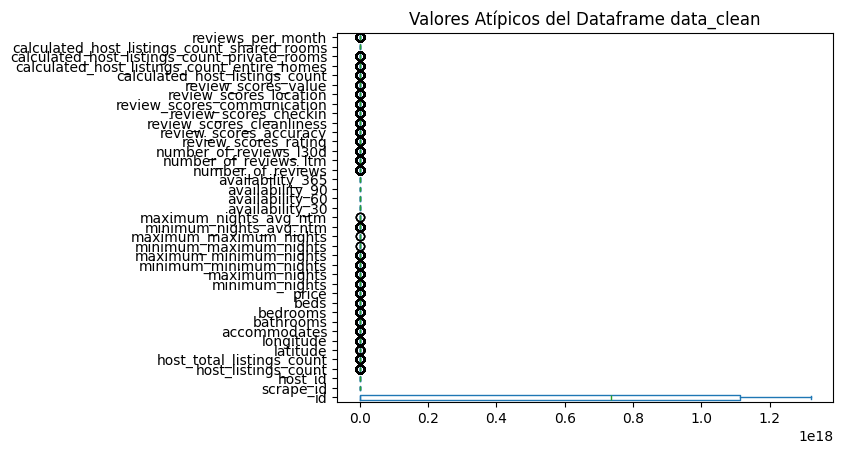

In [62]:
#dibujamos una figura de diagrama de cajas y bigotes todas las columnas del dataframe data_clean
fig = plt.figure(figsize =(15, 8))
data_clean.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe data_clean")
plt.show() #dibujamos el diagrama

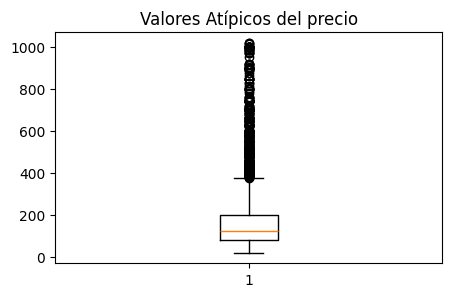

In [63]:
#se dibuja el diagrama de cajas y bigotes de la columna precio del dataframe data_clean
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["price"])
plt.title("Valores Atípicos del precio")
plt.show()

In [64]:
#este codigo concatena  los dataframes cualitativos y data_clean en un nuevo dataframe Datos_limpios
Datos_limpios = pd.concat([cualitativos,data_clean],axis=1)
Datos_limpios

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/97945,2024-12-27,city scrape,Deluxw-Apartm. with roof terrace,In this idyllic stylish flat you live very qui...,We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,https://www.airbnb.com/users/show/517685,Angelika,2011-04-18,...,4.81,4.90,4.93,4.78,4.73,2.0,2.0,0.0,0.0,0.78
1,https://www.airbnb.com/rooms/114695,2024-12-27,city scrape,Apartment Munich/East with sundeck,In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/21571874/960e...,https://www.airbnb.com/users/show/581737,Stephan,2011-05-12,...,4.95,4.97,5.00,4.67,4.62,3.0,3.0,0.0,0.0,0.48
2,https://www.airbnb.com/rooms/127383,2024-12-27,city scrape,City apartment next to Pinakothek,In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/79238c11-bc61...,https://www.airbnb.com/users/show/630556,Sonja,2011-05-26,...,4.81,4.98,4.96,4.91,4.81,1.0,1.0,0.0,0.0,0.70
3,https://www.airbnb.com/rooms/159634,2024-12-27,previous scrape,"Fancy, bright central roof top flat and homeof...",In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/336144dc-b06d...,https://www.airbnb.com/users/show/765694,Susana,2011-07-01,...,4.25,4.75,4.80,4.59,4.45,1.0,1.0,0.0,0.0,0.27
4,https://www.airbnb.com/rooms/170154,2024-12-27,city scrape,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",Residential area in Schwabing-West. There are ...,https://a0.muscache.com/pictures/31636890/593e...,https://www.airbnb.com/users/show/108297,Alex,2010-04-14,...,4.99,4.99,4.98,4.77,4.91,1.0,0.0,1.0,0.0,3.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7276,https://www.airbnb.com/rooms/1318625666596506954,2024-12-27,city scrape,Stylish Home Bogenhausen,Hype two room apartment in Bogenhausen. The br...,Groceries Edeka Rossman <br />tram station <br...,https://a0.muscache.com/pictures/hosting/Hosti...,https://www.airbnb.com/users/show/44358496,Samuel,2015-09-16,...,5.00,5.00,5.00,5.00,5.00,2.0,1.0,1.0,0.0,1.00
7277,https://www.airbnb.com/rooms/1318641181003988391,2024-12-27,city scrape,Boho City Livings Munich,Welcome to your stylish boho home in the middl...,Groceries Edeka Rossman <br />tram station <br...,https://a0.muscache.com/pictures/hosting/Hosti...,https://www.airbnb.com/users/show/175660452,Vanessa Sylvia,2018-02-27,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
7278,https://www.airbnb.com/rooms/1319473798937477143,2024-12-27,city scrape,Welcome to MyCozyHome,"From this centrally located accommodation, you...",Groceries Edeka Rossman <br />tram station <br...,https://a0.muscache.com/pictures/hosting/Hosti...,https://www.airbnb.com/users/show/508416232,Melani-Viktoria,2023-04-03,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
7279,https://www.airbnb.com/rooms/1319597606422421040,2024-12-27,city scrape,3-room apartment in the center of Munich,3-room apartment in the center of Munich with ...,Groceries Edeka Rossman <br />tram station <br...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/594363723,Olga,2024-08-05,...,5.00,5.00,5.00,5.00,5.00,2.0,2.0,0.0,0.0,1.00


In [65]:
Datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7281 entries, 0 to 7280
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   7281 non-null   object 
 1   last_scraped                                  7281 non-null   object 
 2   source                                        7281 non-null   object 
 3   name                                          7281 non-null   object 
 4   description                                   7281 non-null   object 
 5   neighborhood_overview                         7281 non-null   object 
 6   picture_url                                   7281 non-null   object 
 7   host_url                                      7281 non-null   object 
 8   host_name                                     7281 non-null   object 
 9   host_since                                    7281 non-null   o

In [66]:
#El siguiente codigo convierte el dataframe Datos_limpios tanto en un archivo csv
Datos_limpios.to_csv("Datos_limpios.csv")
Datos_limpios.to_excel("Datos_limpios.xlsx")

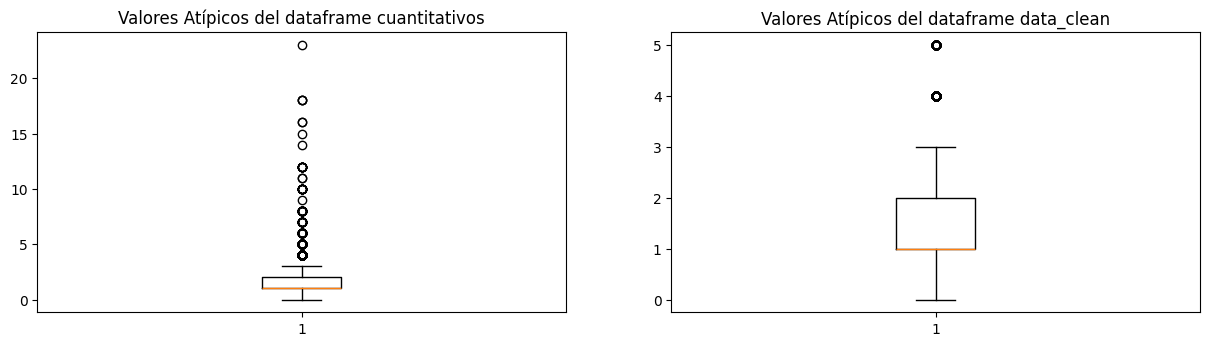

In [72]:
# El siguiente codigo genera en una misma grafica los diagramas de cajas y bigotes
# de la columna beds de los dataframes: cuantitativos y data_clean
fig = plt.figure(figsize =(15, 8))
plt.subplot(2,2,1)
plt.boxplot(cuantitativos["beds"])
plt.title("Valores Atípicos del dataframe cuantitativos")
plt.subplot(2,2,2)
plt.boxplot(data_clean["beds"])
plt.title("Valores Atípicos del dataframe data_clean")
plt.show()